In [27]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [28]:
# TODO：总的记录数
n_records = len(data)

# TODO：被调查者的收入大于$50,000的人数
# 字符串类型
n_greater_50k = len([greater for greater in data['income'] if greater == '>50K'])

# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = len([most for most in data['income'] if most == '<50K' or most == '<=50K'])

# TODO：被调查者收入大于$50,000所占的比例
greater_percent = (n_greater_50k * 1.0 / n_records) * 100

# 打印结果
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [29]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# 显示分离之后的特征数据和标签数据
display(features_raw.head())
display(income_raw.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

C:\Users\23017\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


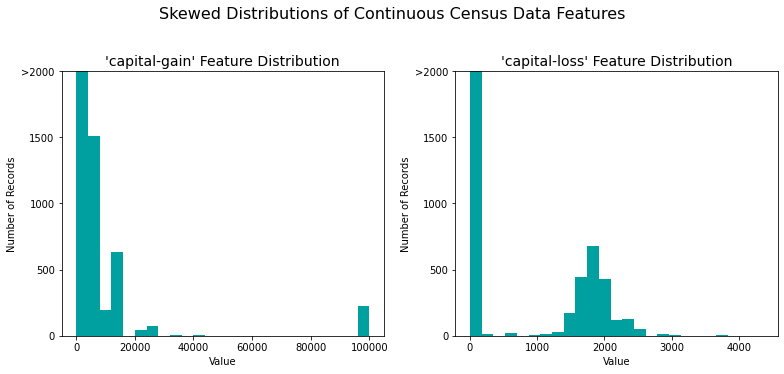

In [30]:
# 可视化 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw)

C:\Users\23017\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


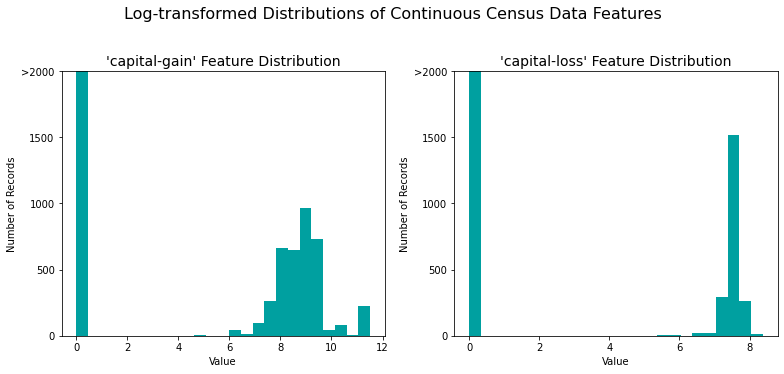

In [31]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化对数转换后 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw, transformed = True)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


In [10]:
import pandas as pd
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)

# TODO：将'income_raw'编码成数字值
#np.array([1 if value =='>50K' else 0 for value in income_raw])
income = income_raw.apply(lambda x: int(x==">50K")) 

print (income)
# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# 移除下面一行的注释以观察编码的特征名字
print (encoded)

0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64
103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Ma

In [11]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0,
                                                    stratify = income)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 28941 samples.
Validation set has 7236 samples.
Testing set has 9045 samples.


In [12]:
#不能使用scikit-learn，你需要根据公式自己实现相关计算。

#TODO： 计算准确率
accuracy = income.sum() / float(n_records)

# TODO： 计算查准率 Precision
precision = n_greater_50k / float(n_records) #准确预测的数目比上预测所有该类别的数目

# TODO： 计算查全率 Recall
recall = n_greater_50k / n_greater_50k #准确预测数目比上所有该类的数目

# TODO： 使用上面的公式，设置beta=0.5，计算F-score
fscore = (1.25*precision*recall) / (0.25 * precision + recall)

# 打印结果
print ("Naive Predictor on validation data: \n \
    Accuracy score: {:.4f} \n \
    Precision: {:.4f} \n \
    Recall: {:.4f} \n \
    F-score: {:.4f}".format(accuracy, precision, recall, fscore))

Naive Predictor on validation data: 
     Accuracy score: 0.2478 
     Precision: 0.2478 
     Recall: 1.0000 
     F-score: 0.2917


In [13]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    
    # TODO: 得到在验证集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] = end - start
            
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO：计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val,predictions_val)
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO：计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val,predictions_val,beta=0.5)
       
    # 成功
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # 返回结果
    return results


DecisionTreeClassifier trained on 289 samples.
DecisionTreeClassifier trained on 2894 samples.
DecisionTreeClassifier trained on 28941 samples.
GaussianNB trained on 289 samples.
GaussianNB trained on 2894 samples.
GaussianNB trained on 28941 samples.
SVC trained on 289 samples.
SVC trained on 2894 samples.
SVC trained on 28941 samples.
{0: {'train_time': 0.004000425338745117, 'pred_time': 0.018001317977905273, 'acc_train': 0.5, 'acc_val': 0.44983416252072966, 'f_train': 0.3442622950819672, 'f_val': 0.3342157511581734}, 1: {'train_time': 0.007000923156738281, 'pred_time': 0.019001007080078125, 'acc_train': 0.41333333333333333, 'acc_val': 0.41804864566058597, 'f_train': 0.309126594700687, 'f_val': 0.3399371444484226}, 2: {'train_time': 0.06100654602050781, 'pred_time': 0.018999099731445312, 'acc_train': 0.6166666666666667, 'acc_val': 0.5866500829187397, 'f_train': 0.40645161290322573, 'f_val': 0.42021197193610993}}
{0: {'train_time': 0.004000186920166016, 'pred_time': 0.1550111770629882

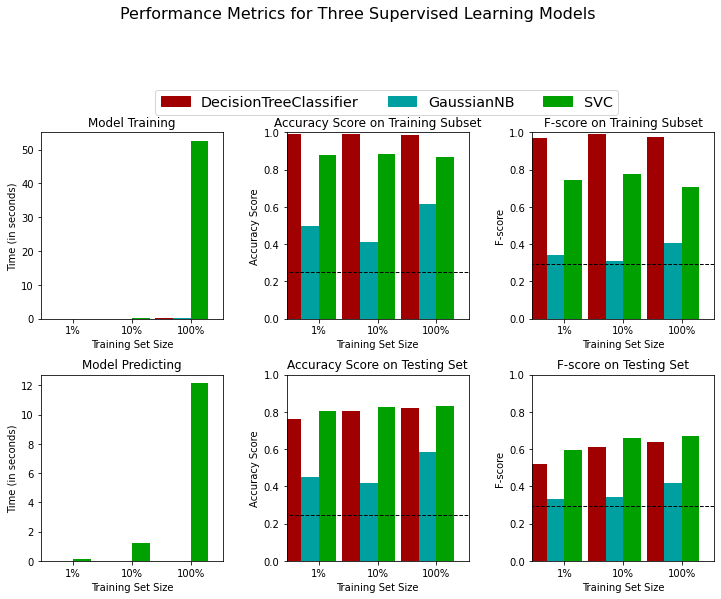

In [14]:
# TODO：从sklearn中导入三个监督学习模型

# DecisionTree
from sklearn import tree

#Guassian naive byes
from sklearn import naive_bayes

#SVM
from sklearn import svm

# TODO：初始化三个模型
clf_A = tree.DecisionTreeClassifier(random_state=42)
clf_B = naive_bayes.GaussianNB()
clf_C = svm.SVC()

# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(len(X_train) * 0.01)
samples_10 = int(len(X_train) * 0.1)
samples_100 = len(X_train)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

print (results['GaussianNB'])
print (results['SVC'])
print (results['DecisionTreeClassifier'])
# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)


In [16]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import make_scorer
# TODO：初始化分类器
clf = tree.DecisionTreeClassifier(random_state=42)

# TODO：创建你希望调节的参数列表
# 控制树的最大深度(防止过拟合)和最少分类个数
parameters = {'max_depth':range(5,10),'min_samples_split':range(2,10)}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
kfold = KFold(n_splits=10) #切割成十份
# 同时传入交叉验证函数
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=kfold)
# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train,y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# 汇报调参前和调参后的分数
print ("\nUnoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))


Unoptimized model
------
Accuracy score on validation data: 0.8208
F-score on validation data: 0.6386

Optimized Model
------
Final accuracy score on the validation data: 0.8615
Final F-score on the validation data: 0.7416


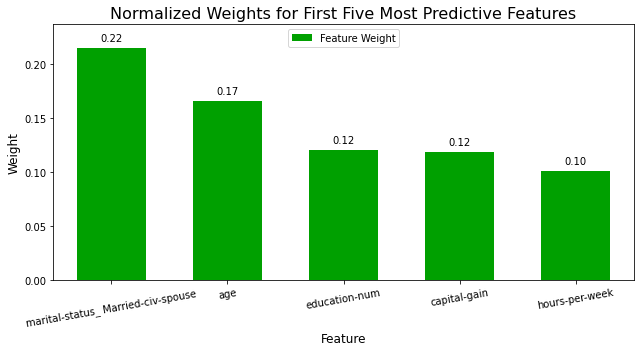

In [17]:
# TODO：导入一个有'feature_importances_'的监督学习模型
# TODO：在训练集上训练一个监督学习模型
model = clf

# TODO： 提取特征重要性
importances = clf.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)


In [18]:
# 导入克隆模型的功能
from sklearn.base import clone

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_val_reduced = X_val[X_val.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 在前面的网格搜索的基础上训练一个“最好的”模型
clf_on_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)

# 做一个新的预测
reduced_predictions = clf_on_reduced.predict(X_val_reduced)

# 对于每一个版本的数据汇报最终模型的分数
print ("Final Model trained on full data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, reduced_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on validation data: 0.8615
F-score on validation data: 0.7416

Final Model trained on reduced data
------
Accuracy on validation data: 0.8480
F-score on validation data: 0.6975


In [19]:
#TODO test your model on testing data and report accuracy and F score
copy_test = [value for value in X_test]
copy_predicts = best_clf.predict(X_test)

print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_test, copy_predicts)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_test, copy_predicts, beta = 0.5)))

# 选择这个模型是因为在时间上比较效率,在准确率和 F-Score 上也都能获得相对较高的得分.
# 最终结果准确率为0.8551,F-Score 为0.7278,都比较良好,能进行相对较好的预测.

Accuracy on validation data: 0.8551
F-score on validation data: 0.7278


In [20]:
#TODO test your model on testing data and report accuracy and F score
copy_test = [value for value in X_test]
copy_predicts = best_clf.predict(X_test)

print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_test, copy_predicts)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_test, copy_predicts, beta = 0.5)))

# 选择这个模型是因为在时间上比较效率,在准确率和 F-Score 上也都能获得相对较高的得分.
# 最终结果准确率为0.8551,F-Score 为0.7278,都比较良好,能进行相对较好的预测.


Accuracy on validation data: 0.8551
F-score on validation data: 0.7278
